# # **Notebook: Introducción a la Ciencia de Datos con Python**
#### Por: Jennifer Grisales Casadiegos

## **Sección 1: Tipos de Series de Datos**

En ciencia de datos, podemos encontrarnos con:

- **Series temporales** (datos con un orden cronológico)
- **Series espaciales** (dependen de la ubicación geográfica)
- **Series categóricas** (divididas por categorías o clases)

En este taller, usamos datos de consumo de energía global (2000–2024), que a menudo se analizan como **series temporales** si contienen un campo de año/fecha, además de posibles variables categóricas (país, región) y numéricas (consumo).

### **Objetivo de esta Sección**
- Identificar los tipos de datos disponibles en el dataset: numéricos, categóricos, fechas, etc.  
- Diferenciar cómo tratar las **series de tiempo** y **series categóricas**.


In [ ]:
# 1. Importar librerías esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Opción para mostrar gráficas dentro de la notebook
%matplotlib inline

# 3. (Opcional) Ajustar la visualización de dataframes
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

### **Extensiones Comunes de Datasets**

En ciencia de datos, los archivos suelen venir en distintos **formatos**. Con `pandas`, puedes leer la mayoría de ellos con sus funciones integradas:

1. **CSV (Comma-Separated Values)**  
   - **Extensión**: `.csv`  
   - **Lectura en Pandas**:  
     ```python
     import pandas as pd
     df = pd.read_csv("archivo.csv")
     ```

2. **Excel**  
   - **Extensión**: `.xlsx` o `.xls`  
   - **Lectura en Pandas**:  
     ```python
     df = pd.read_excel("archivo.xlsx", sheet_name="Hoja1")
     ```
   - Ajusta `sheet_name` según la hoja que quieras leer.

3. **JSON (JavaScript Object Notation)**  
   - **Extensión**: `.json`  
   - **Lectura en Pandas**:  
     ```python
     df = pd.read_json("archivo.json")
     ```

4. **Archivo de texto plano (TXT)**  
   - **Extensión**: `.txt`  
   - **Lectura en Pandas**:
     ```python
     # Si tus datos están delimitados por comas, tabulaciones u otro carácter
     df = pd.read_csv("archivo.txt", delimiter="\t")  # Ejemplo: delimitador tab
     ```
   - Ajusta el `delimiter` según el carácter separador de columnas.

5. **Otros formatos**  
   - **HTML**: `pd.read_html("archivo.html")`  
   - **Pickle**: `pd.read_pickle("archivo.pkl")`  
   - **Parquet**: `pd.read_parquet("archivo.parquet")` (útil para grandes volúmenes de datos).

En cada caso, es posible añadir **parámetros adicionales** para especificar codificaciones (`encoding='utf-8'` o `latin-1`), separadores (`sep=','`), nombres de columnas (`names=[...]`), y mucho más. Los detalles se encuentan en la documentación oficial de PANDAS.


### **Carga del dataset**

En Google Colab podemos **subir** el CSV manualmente a la carpeta de trabajo, o bien **montar** Google Drive.  
1. Sube el CSV de Kaggle a la carpeta principal de Colab o a tu Google Drive.  
2. Actualiza la ruta del archivo en la siguiente celda de código para que coincida con donde se encuentra tu dataset.

---


In [ ]:
# Actualiza la ruta a tu archivo CSV
#Dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-energy-consumption-2000-2024
ruta_csv = "/content/global_energy_consumption.csv"

# Lectura del archivo CSV
df = pd.read_csv(ruta_csv)


**Análisis inicial de las columnas**  
Revisaremos el tipo de datos que presenta cada columna para saber si se trata de una **serie temporal** (año o fecha), series **numéricas** (consumo, producciones, etc.) y/o series **categóricas** (región, fuente de energía, país, etc.).

---


In [ ]:
print("Dimensiones del DataFrame:", df.shape)
df.head(5)

Dimensiones del DataFrame: (10000, 10)


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [ ]:
#df.info()
print("\nColumnas del dataset:")
print(df.columns.to_list())



Columnas del dataset:
['Country', 'Year', 'Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']


**Ejercicio**  
1. Basándote en la salida de `df.info()`, **clasifica** cada columna en:
   - **Temporal** (si existe un campo de fecha o año)
   - **Numérica**
   - **Espacial**
   - **Categórica**

2. ¿Hay alguna columna que se pueda convertir a tipo fecha (`datetime`)?

---


## **Sección 2: Análisis Exploratorio de Datos (EDA)**

### 2.1 Inspección y Estadísticas Descriptivas

**Objetivo**  
- Entender la **distribución** de los datos.
- Identificar valores máximos, mínimos, promedios, etc.

---


In [ ]:

# Muestra las primeras 5 filas
#display(df.head(5))
print("---------------------------------------------")
#df.head(10)

# Muestra 5 filas aleatorias
#display(df.sample(15))
#df.sample(10)
# Describe estadísticas de las columnas numéricas
display(df.describe())


---------------------------------------------


,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2012.151400,5142.564425,25039.950516,47.322925,44.932851,40.057585,25.043290,2536.148007,0.273466
std,7.155236,2848.754040,14205.659284,24.603767,20.202800,11.538756,8.597024,1424.105067,0.130782
min,2000.000000,100.480000,500.270000,5.000000,10.010000,20.000000,10.000000,50.640000,0.050000
25%,2006.000000,2713.882500,12683.220000,26.110000,27.337500,30.217500,17.610000,1293.330000,0.160000
50%,2012.000000,5190.850000,25098.770000,47.150000,45.110000,39.980000,25.090000,2568.015000,0.270000
75%,2018.000000,7579.977500,37113.282500,68.682500,62.430000,50.150000,32.570000,3766.182500,0.390000
max,2024.000000,9999.260000,49989.570000,90.000000,80.000000,60.000000,40.000000,4999.340000,0.500000


**Ejercicio**  
1. Utiliza `df.tail()` para ver las últimas filas del DataFrame.  
2. Verifica si las estadísticas (`mean`, `max`, `min`) son coherentes.  

---


In [ ]:
df.tail()

print("---------------------------------------------")

valor_minimo = df['Year'].min()

type(valor_minimo)

---------------------------------------------


int

### 2.2 Filtrado y Selección de datos

Necesitamos filtrar por país, región, o un rango de fechas, según el análisis que deseemos hacer.


In [ ]:
# EJEMPLO: Filtrar filas si existe una columna 'Country' y queremos ver 'China'
# Ajusta el nombre de la columna y el valor a tu dataset
#if 'Country' in df.columns:
#    filtro_china = df[df['Country'] == 'China']
#    print("Filas asociadas a China:")
#    display(filtro_china.head())
#else:
#    print("No se encontró la columna 'Country'. Ajusta el ejemplo.")

# EJEMPLO: Seleccionar solo columnas específicas
columnas_interes = ['Year', 'Country', 'Total Energy Consumption (TWh)']  # Ajusta a tu dataset
df_seleccion = df[columnas_interes] if set(columnas_interes).issubset(df.columns) else df
df_seleccion.head()


,Year,Country,Total Energy Consumption (TWh)
0,2018,Canada,9525.38
1,2020,Germany,7922.08
2,2002,Russia,6630.01
3,2010,Brazil,8580.19
4,2006,Canada,848.88


In [ ]:
df_seleccion = df[['Year', 'Country', 'Per Capita Energy Use (kWh)']]
df_seleccion.head()

,Year,Country,Per Capita Energy Use (kWh)
0,2018,Canada,42301.43
1,2020,Germany,36601.38
2,2002,Russia,41670.20
3,2010,Brazil,10969.58
4,2006,Canada,32190.85


In [ ]:
type(columnas_interes)

list

**Ejercicio**  
1. Filtra otro país (o región) para ver las primeras filas.  
2. Selecciona únicamente las columnas que te interesan y muestra las 10 primeras filas.

---


### 2.3 Agrupación y Agregación

Resumir datos por año, país o categoría para obtener promedios, sumas, conteos.


In [ ]:
if 'Country' in df.columns and 'Total Energy Consumption (TWh)' in df.columns:
     df_agrupado= df.groupby('Country')['Total Energy Consumption (TWh)'].mean()
    print("Suma de consumo de energía por año:")
    display(df_agrupado.head(10))
else:
    print("Ajusta los nombres de columna según tu dataset para agrupar.")


Suma de consumo de energía por año:


,Total Energy Consumption (TWh)
Country,
Australia,5046.237081
Brazil,4858.032318
Canada,5086.422684
China,5036.665137
Germany,5184.558661
India,5266.872149
Japan,5279.490111
Russia,5058.404550
UK,5262.176180


In [ ]:
df_agrupado

,Total Energy Consumption (TWh)
Country,
Australia,5046.237081
Brazil,4858.032318
Canada,5086.422684
China,5036.665137
Germany,5184.558661
India,5266.872149
Japan,5279.490111
Russia,5058.404550
UK,5262.176180


**Ejercicio**  
1. Prueba agrupar por `Country` y obtener la **media** de `Energy Consumption`.  
2. Asigna el resultado a una variable y utiliza `sort_values()` para ver los países con mayor o menor consumo promedio.

---


In [ ]:
df_agrupado.sort_values()

,Total Energy Consumption (TWh)
Country,
Brazil,4858.032318
China,5036.665137
Australia,5046.237081
Russia,5058.404550
Canada,5086.422684
Germany,5184.558661
UK,5262.176180
India,5266.872149
Japan,5279.490111


## **Sección 2.4: Visualización en EDA**

---



La visualización facilita **identificar patrones**, **outliers** y **tendencias**. Utilizaremos `matplotlib`.

### Gráficos frecuentes:
1. **Histogramas**: Dispersión de datos numéricos.  
2. **Barras**: Conteos de categorías o valores resumidos.  
3. **Scatter plots (dispersión)**: Relación entre dos variables numéricas.  
4. **Boxplots**: Detección de valores atípicos y distribución.

Un dataset para practicar visualización: https://www.kaggle.com/datasets/aemyjutt/salesdata/data

---


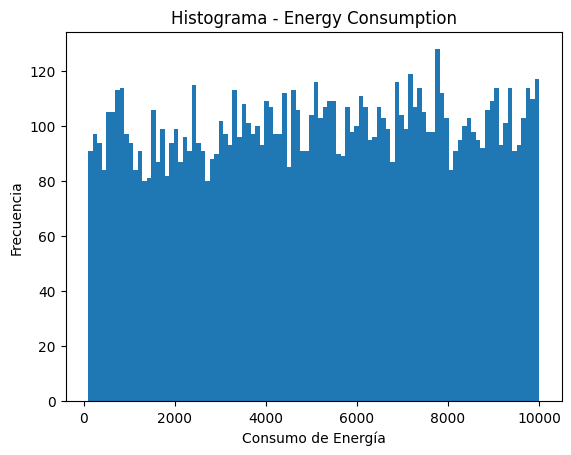

In [ ]:
import matplotlib.pyplot as plt

# Verifica si la columna 'Energy Consumption' existe
if 'Total Energy Consumption (TWh)' in df.columns:
    plt.hist(df['Total Energy Consumption (TWh)'].dropna(), bins=100)
    plt.title('Histograma - Energy Consumption')
    plt.xlabel('Consumo de Energía')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("Ajusta el nombre de la columna para el histograma.")


**Ejercicio**  
1. Ajusta el número de `bins` para ver cómo cambia la forma del histograma.  
2. Prueba hacer un histograma de otra columna numérica si existe.  

---


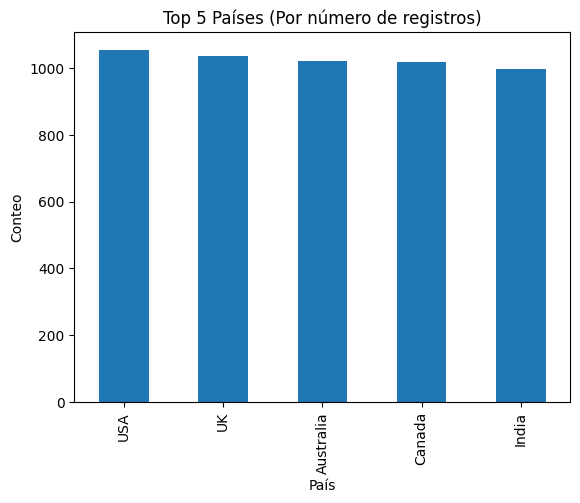

In [ ]:
# Ejemplo: Mostrar los 5 países con más registros (o un top de países)
if 'Country' in df.columns:
    top_paises = df['Country'].value_counts().head(5)
    top_paises.plot(kind='bar')
    plt.title('Top 5 Países (Por número de registros)')
    plt.xlabel('País')
    plt.ylabel('Conteo')
    plt.show()
else:
    print("Ajusta la columna 'Country' según tu dataset.")


**Ejercicio**  
1. Muestra un **top 10** en lugar del top 5.  
2. Si tu dataset tiene otra columna categórica (por ejemplo, `Region`), repite el ejercicio para ver cuántos registros hay por región.

---



In [ ]:
# Ejemplo: Relación entre 'Year' y 'Energy Consumption'
if 'Year' in df.columns and 'Energy Consumption' in df.columns:
    plt.scatter(df['Year'], df['Energy Consumption'])
    plt.title('Relación Año vs. Consumo de Energía')
    plt.xlabel('Año')
    plt.ylabel('Consumo de Energía')
    plt.show()
else:
    print("Ajusta los nombres de columna para el scatter plot.")


Ajusta los nombres de columna para el scatter plot.


**Ejercicio**  
1. Si tu dataset no tiene año, busca dos columnas numéricas y genera un scatter plot.  
2. Observa si hay tendencia positiva, negativa o no hay relación aparente.

---



In [ ]:
if 'Energy Consumption' in df.columns:
    plt.boxplot(df['Energy Consumption'].dropna())
    plt.title('Boxplot - Energy Consumption')
    plt.ylabel('Consumo de Energía')
    plt.show()
else:
    print("Ajusta el nombre de la columna para el boxplot.")


Ajusta el nombre de la columna para el boxplot.


**Ejercicio**  
1. Identifica si existen **outliers**.  
2. Intenta crear un boxplot para una columna distinta, como `Population` o `CO2 Emissions` (si tu dataset las contiene).  

---


# Sección 3: Limpieza de Datos con el dataset "Dirty Cafe Sales"

En esta sección, vamos a:
- **Identificar y manejar datos faltantes** (NaN)
- **Detectar y eliminar duplicados**
- **Ajustar tipos de datos** según sea necesario

El objetivo es dejar nuestros datos limpios para posteriores análisis y modelado.

---

## Cargar y visualizar el dataset

Primero, cargaremos el dataset "dirty_cafe_sales.csv" y realizaremos una inspección inicial para entender su estructura y detectar posibles problemas (valores nulos, duplicados, formatos incorrectos, etc.).

---

In [1]:
# Cargar el dataset "dirty_cafe_sales.csv"
import pandas as pd

# Ajusta la ruta.
df = pd.read_csv("/content/dirty_cafe_sales.csv")

# Mostrar dimensiones y primeras filas
print("Dimensiones del DataFrame:", df.shape)
display(df.head())


Dimensiones del DataFrame: (10000, 8)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [2]:
# Revisar la información general del DataFrame
df.info()

# Mostrar estadísticas descriptivas para columnas numéricas
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


## Verificar datos faltantes

Usaremos `isnull()` para identificar la cantidad y el porcentaje de valores nulos en cada columna. Esto nos ayudará a decidir si eliminamos o imputamos los valores faltantes.

---

In [3]:
# Calcular la cantidad de valores nulos por columna
nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos)

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100
print("\nPorcentaje de nulos por columna:")
print(porcentaje_nulos)



Valores nulos por columna:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Porcentaje de nulos por columna:
Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64


## Ejercicio: Imputación de valores faltantes

Elige una columna numérica con valores nulos y realiza la imputación usando:
- La **media**
- La **mediana**

Puedes comparar el efecto de cada método en el dataset.


---



In [4]:
# Ejemplo: Imputar valores faltantes en una columna (ajusta el nombre 'Total_Sales' por el nombre real de la columna numérica)
if 'Total_Sales' in df.columns:
    # Imputar con la media
    df_imputada_media = df.copy()
    media_total = df_imputada_media['Total_Sales'].mean()
    df_imputada_media['Total_Sales'] = df_imputada_media['Total_Sales'].fillna(media_total)
    print("Imputación con media realizada en 'Total_Sales'.")

    # Imputar con la mediana
    df_imputada_mediana = df.copy()
    mediana_total = df_imputada_mediana['Total_Sales'].median()
    df_imputada_mediana['Total_Sales'] = df_imputada_mediana['Total_Sales'].fillna(mediana_total)
    print("Imputación con mediana realizada en 'Total_Sales'.")
else:
    print("Ajusta el nombre de la columna numérica a imputar.")


Ajusta el nombre de la columna numérica a imputar.


## Verificar y eliminar duplicados

Los datos duplicados pueden afectar el análisis. Revisaremos si hay filas duplicadas y procederemos a eliminarlas.

---


In [5]:
# Contar filas duplicadas en el DataFrame original
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Eliminar duplicados y mostrar las nuevas dimensiones
df_sin_duplicados = df.drop_duplicates()
print("Dimensiones tras eliminar duplicados:", df_sin_duplicados.shape)



Número de filas duplicadas: 0
Dimensiones tras eliminar duplicados: (10000, 8)


## Ajuste de tipos de datos

Es importante que los datos tengan el tipo correcto. Por ejemplo, si contamos con una columna de fecha (como "Date" o "Order_Date"), debemos convertirla a `datetime`.

Ejemplo:
- Convertir la columna "Date" a formato datetime con `pd.to_datetime()`.

---


In [6]:
# Ejemplo: Convertir la columna 'Date' a formato datetime, si existe
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' convierte errores a NaT
    print("Columna 'Date' convertida a datetime.")
else:
    print("No se encontró la columna 'Date'. Ajusta el nombre según tu dataset.")


No se encontró la columna 'Date'. Ajusta el nombre según tu dataset.


## Conclusiones de la sección de limpieza de datos

En esta sección hemos:
- Cargado y visualizado el dataset "Dirty Cafe Sales".
- Identificado y analizado los valores nulos.
- Realizado ejemplos de imputación de valores faltantes.
- Detectado y eliminado duplicados.
- Ajustado tipos de datos, por ejemplo, convirtiendo columnas de fecha a `datetime`.

Estos pasos son esenciales para preparar los datos y asegurar que nuestros análisis posteriores sean precisos y fiables.